In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io

import os

%matplotlib inline

## Part 1 - Multi-Class Classification

### 1.1 Dataset

In [2]:
# Read the data
# Read the data
FOLDER = 'data'
FILE = 'ex3data1.mat'
path = os.path.join(FOLDER, FILE)

data = scipy.io.loadmat(path)

X = data['X']
Y = data['y'].flatten()
print("X is of dimensions {0}".format(X.shape))
print("y is of dimensions {0}".format(Y.shape))

X is of dimensions (5000, 400)
y is of dimensions (5000,)


### 1.2 Visualizing the data

True value = 2


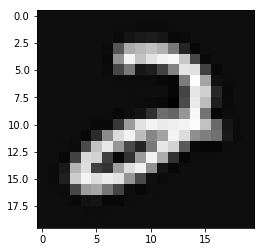

In [3]:
plt.gray()
row = 1050
plt.imshow(X[row,:].reshape((20,20), order = 'F'), aspect = 'equal')
print("True value = {0}".format(Y[row].item()))

### 1.3 Vectorizing logistic regression

In [4]:
def sigmoid(z):
    '''
    Calculates the output of the sigmoid function
    '''
    res = 1 / (1 + np.exp(-z))
    return res

def costFunction(theta, x, y):
    '''
    Return the cost function for logistic regression
    '''
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    prob = sigmoid(np.dot(x, theta))
    J = -y*np.log(prob) -(1-y)*np.log(1-prob)
    return J.mean()

def gradFunction(theta, x, y):
    '''
    Return the gradient for logistic regression
    '''
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    grad = np.dot(x.T, sigmoid(np.dot(x, theta)) - y) / m
    return grad

In [5]:
def costFunctionReg(theta, x, y, l):
    '''
    Return the cost function for logistic regression
    '''
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    prob = sigmoid(np.dot(x, theta))
    J = -y*np.log(prob) -(1-y)*np.log(1-prob)
    return J.mean() + l*np.sum(np.power(theta[1:],2))/(2*m)

def gradFunctionReg(theta, x, y, l):
    '''
    Return the gradient for logistic regression
    '''
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    grad = np.dot(x.T, sigmoid(np.dot(x, theta)) - y) / m
    grad[1:] += l/m * theta[1:]
    return grad

### 1.4 One-vs-All classification

In [6]:
def oneVsAll(x, y, num_labels, l):
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = x.shape[0]
    n = x.shape[1]
    
    # add bias term to x
    x_b = np.hstack((np.ones((x.shape[0],1)), x))
    
    # set initial theta
    init_theta = np.ones((num_labels, n+1))
    
    for label in range(num_labels):
        print(label)
        y_label = ((np.mod(y,10) == label)*1).flatten()
        theta_opt = opt.fmin_cg(costFunctionReg, init_theta[label], fprime = gradFunctionReg, args=(x_b, y_label, l))
        init_theta[label] = theta_opt
    
    return init_theta  

def predictOneVsAll(theta, x):
    # add bias term to x
    x_b = np.hstack((np.ones((x.shape[0],1)), x))
    
    y_res = sigmoid(np.dot(x_b, theta.T))
    return np.argmax(y_res, axis = 1)

In [7]:
theta_all = oneVsAll(X, Y, 10, 0.1)

0


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.008585
         Iterations: 142
         Function evaluations: 563
         Gradient evaluations: 563
1


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.013149
         Iterations: 140
         Function evaluations: 533
         Gradient evaluations: 533
2


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.050824
         Iterations: 252
         Function evaluations: 783
         Gradient evaluations: 783
3


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 263
         Function evaluations: 813
         Gradient evaluations: 813
4


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.033073
         Iterations: 207
         Function evaluations: 714
         Gradient evaluations: 714
5


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.054489
         Iterations: 254
         Function evaluations: 802
         Gradient evaluations: 802
6


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.018269
         Iterations: 169
         Function evaluations: 632
         Gradient evaluations: 632
7


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.030652
         Iterations: 210
         Function evaluations: 711
         Gradient evaluations: 711
8


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.078452
         Iterations: 380
         Function evaluations: 1064
         Gradient evaluations: 1064
9


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.071206
         Iterations: 321
         Function evaluations: 923
         Gradient evaluations: 923


In [8]:
y_pr = predictOneVsAll(theta_all, X)
print("Prediction accuracy: {0}%".format(round((np.mod(Y,10).flatten()==y_pr).mean()*100,3)))

Prediction accuracy: 96.46%


## Part 2 - Neural Networks

### 2.1 Model Representation

In [9]:
# Read network parameters
FILE = 'ex3weights.mat'
path = os.path.join(FOLDER, FILE)

weights = scipy.io.loadmat(path)
theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [10]:
theta2.shape

(10, 26)

### 2.2 Feed forward propagation and prediction

In [11]:
def predict(t1, t2, x):
    assert t1.shape[0] == t2.shape[1] - 1, "Mismatch in shapes between the weight of different layers"

    # add bias term to x
    x_0 = np.hstack((np.ones((x.shape[0],1)), x))
    
    assert x_0.shape[1] == t1.shape[1], "Mismatch in shapes between input and 1st layer weights"
    
    a_1 = sigmoid(np.dot(x_0, t1.T))

    # add bias term to a_1
    a_1b = np.hstack((np.ones((a_1.shape[0],1)),a_1))

    a_2 = sigmoid(np.dot(a_1b, t2.T))

    
    return np.argmax(a_2, axis = 1)+1

In [12]:
y_nn = predict(theta1, theta2, X)
print("Prediction accuracy: {0}".format(round((np.mod(Y,10).flatten()==y_nn).mean()*100, 3)))

Prediction accuracy: 87.6
